In [5]:
#Importando librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras

In [6]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist


#Cargando la división de entrenamiento y prueba
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

In [7]:
#Normalizando los valores de los pixeles
training_images = training_images / 255.0
test_images = test_images / 255.0

#Construyendo el modelo de clasificación
model = keras.models.Sequential([
    #Agregando convolucionales y max pooling
    keras.layers.Conv2D(32 , (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(2, 2),
    #Agregando las mismas capas que antes
    keras.layers.Flatten(), 
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')])

#Compilando el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               692352    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
________________________________________________

Epoch 1/10
1875/1875 [==============================] - 14s 4ms/step - loss: 0.1542 - accuracy: 0.9534
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0523 - accuracy: 0.9844
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0338 - accuracy: 0.9896
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0224 - accuracy: 0.9927
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0152 - accuracy: 0.9951
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0108 - accuracy: 0.9965
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0090 - accuracy: 0.9971
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0063 - accuracy: 0.9980
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0055 - accuracy: 0.9981
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.00

<Axes: >

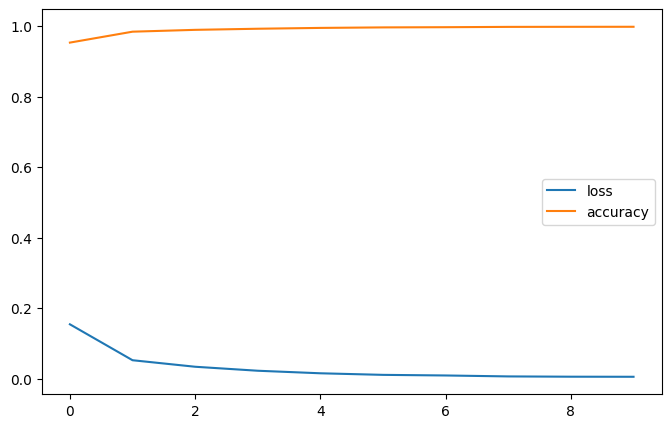

In [8]:
#Entrenando el modelo
history = model.fit(training_images, training_labels, epochs=10)

#Graficando el historial de entrenamiento
pd.DataFrame(history.history).plot(figsize=(8, 5))

In [10]:
#Evaluando el modelo en el conjunto de entrenamiento
loss, accuracy = model.evaluate(training_images, training_labels)
print(f'Loss: {loss}, Accuracy: {accuracy}')

#Evaluando el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(test_images, test_labels)
print(f'Loss: {loss}, Accuracy: {accuracy}')


1875/1875 [==============================] - 7s 4ms/step - loss: 0.0037 - accuracy: 0.9988
Loss: 0.0036977475974708796, Accuracy: 0.9987666606903076
313/313 [==============================] - 1s 3ms/step - loss: 0.0489 - accuracy: 0.9880
Loss: 0.04887961223721504, Accuracy: 0.9879999756813049


In [11]:
print(test_labels[:30])

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]


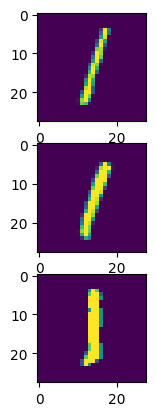

In [18]:
#Visualizando tres imagenes con la misma etiqueta

FIRST_IMAGE = 2
SECOND_IMAGE = 5
THIRD_IMAGE = 14


f, axarr = plt.subplots(3,1)
axarr[0].imshow(test_images[FIRST_IMAGE])
axarr[1].imshow(test_images[SECOND_IMAGE])
axarr[2].imshow(test_images[THIRD_IMAGE])

1/1 [==============================] - 0s 25ms/step


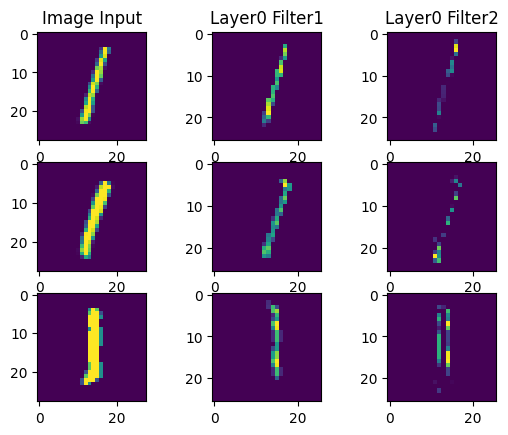

In [19]:
#Extrayendo activaciones
layer = 0
filter1 = 0
filter2 = 10

layer_outputs = [layer.output for layer in model.layers]
activation_model = keras.models.Model(inputs = model.input, outputs = layer_outputs)

#Visualizando convoluciones
f, axarr = plt.subplots(3,3)

axarr[0, 0].set_title('Image Input')
axarr[0, 0].imshow(test_images[FIRST_IMAGE])
f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[layer]

axarr[0, 1].set_title("Layer" + str(layer) + " Filter1")
axarr[0, 1].imshow(f1[0, :, :, filter1])
axarr[0, 2].set_title("Layer" + str(layer) + " Filter2")
axarr[0, 2].imshow(f1[0, :, :, filter2])

axarr[1, 0].imshow(test_images[SECOND_IMAGE])
f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[layer]
axarr[1, 1].imshow(f2[0, :, :, filter1])
axarr[1, 2].imshow(f2[0, :, :, filter2])

axarr[2, 0].imshow(test_images[THIRD_IMAGE])
f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[layer]
axarr[2, 1].imshow(f3[0, :, :, filter1])
axarr[2, 2].imshow(f3[0, :, :, filter2])